# Exploring Bifurcation Diagrams

**Prepared by Rajesh S ( @aiexplorations)**

In the study of nonlinear dynamical systems, it is common to evaluate how nonlinear functions of different kinds exhibit period doubling as parameters that describe system states change. In this notebook, I'm attempting to explore three different kinds of maps, and their associated period doubling behaviour, through [bifurcation diagrams](https://en.wikipedia.org/wiki/Bifurcation_diagram).

1. **Logistic map**: A relatively well known function described by $x_{n+1} = r x_n * (1 - x_n)$, the [logistic map](https://en.wikipedia.org/wiki/Logistic_map)'s bifurcation diagram is plotted as the change in $x_n$ with varying values of $r$. Since each value of $x_n$ depends on the previous value in a nonlinear fashion, a sensitive dependence on initial conditions is exhibited. Depending on starting values and the parameter values of $r$, the function exhibits smoothness or randomness.
2. **Circle map**: Circle maps are associated with [Arnold Tongues](https://en.wikipedia.org/wiki/Arnold_tongue) and are described by the iteration $\theta_{n+1} = \theta_n + \Omega - \frac{K}{2\pi}sin(2\pi\theta_n) $. 
3. **Gauss iterated map**: This is a nonlinear iterated map defined as $x_{n+1} = e^{- \alpha x_n^2 } + \beta$, and is generally computed like the Logistic map.

Related ideas:
1. [Pitchfork bifurcation](https://en.wikipedia.org/wiki/Pitchfork_bifurcation)
2. [Logistic differential equation](https://en.wikipedia.org/wiki/Logistic_function#Logistic_differential_equation)
3. *Simple mathematical models with very complicated dynamics*, Robert M. May ([open access link](https://pdfs.semanticscholar.org/752e/0468e5e2e6a1c175b401eddd74bbbdcb9d5c.pdf))
4. [Feigenbaum constants](https://en.wikipedia.org/wiki/Feigenbaum_constants)

In [383]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib #importing this separately to access colourmaps

In [382]:
colors = matplotlib.cm.get_cmap('plasma') #Setting a reusable colour map

# Logistic Map

See definition of logistic map function [above](#Exploring-Bifurcation-Diagrams).

In [322]:
def logistic_map(x_prev, r):
    return r * x_prev * (1 - x_prev) 

In [323]:
rs = np.arange(0.001, 4, 0.01)
x0 = 0.001
iterations = 100

logistic_map_values = pd.DataFrame()
for r in rs:
    xcurrent = x0
    series = []
    for iteration in range(iterations):
        xnew = logistic_map(xcurrent, r)
        series.append(xnew)
        xcurrent = xnew
    #print(series)
    logistic_map_values[r] = pd.Series(series)

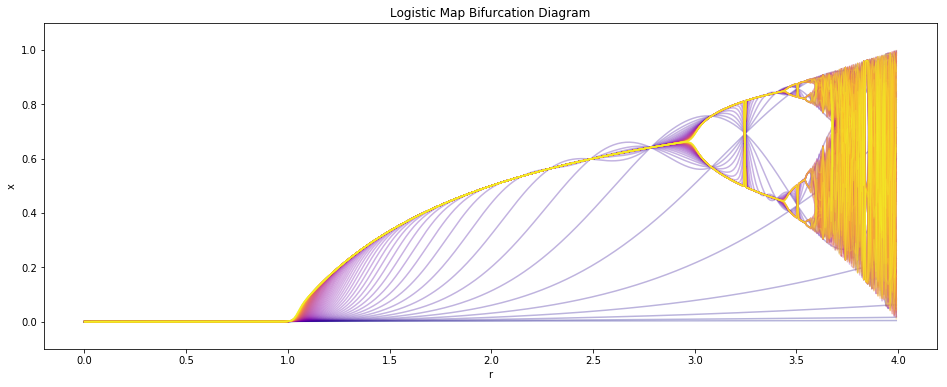

In [390]:
logistic_map_values.T.plot(figsize = (16,6), ylim = (-0.1,1.1), legend = False, colormap=colors , alpha = 0.3, 
                           title = "Logistic Map Bifurcation Diagram")
plt.xlabel("r");
plt.ylabel("x");
plt.show()

# Circle Map

See definition of circle map function [above](#Exploring-Bifurcation-Diagrams).

In [325]:
def circle_map(theta_prev, omega, k):
    return theta_prev + omega - (k/(2*np.pi))*np.sin(2*np.pi*theta_prev)

In [326]:
omega = 0.1
ks = np.arange(0.001, np.pi, 0.01)
theta0 = 0.001
iterations = 1000

circle_map_values = pd.DataFrame()

for k in ks:
    theta_current = theta0
    series = []
    for iteration in range(iterations):
        theta_new = circle_map(theta_current, omega, k)
        series.append(theta_new)
        theta_current = theta_new
    #print(series)
    circle_map_values[k] = pd.Series(series)

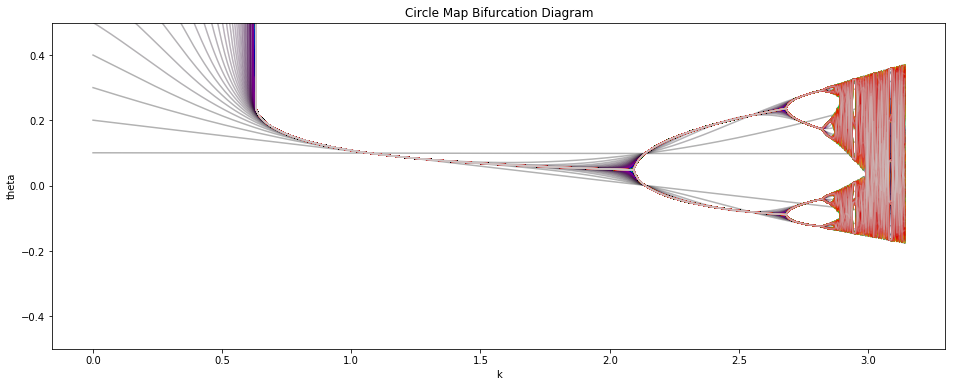

In [392]:
circle_map_values.T.plot(figsize = (16,6), ylim = (-0.5,0.5), legend = False,  alpha = 0.3, colormap='nipy_spectral',
                         title = "Circle Map Bifurcation Diagram")
plt.xlabel("k");
plt.ylabel("theta");

# Gauss Iterated Map

See definition of Gauss iterated map function [above](#Exploring-Bifurcation-Diagrams).

In [193]:
def gauss_iterated_map(x_prev, alpha, beta):
    return np.exp(-alpha * x_prev**2) + beta

In [343]:
alpha = 4.9
betas = np.arange(-1.5, np.pi, 0.01)
x0 = 0.001
iterations = 1000

gauss_map_values = pd.DataFrame()
for beta in betas:
    xcurrent = x0
    series = []
    for iteration in range(iterations):
        xnew = gauss_iterated_map(xcurrent, alpha, beta)
        series.append(xnew)
        xcurrent = xnew
    #print(series)
    gauss_map_values[beta] = pd.Series(series)

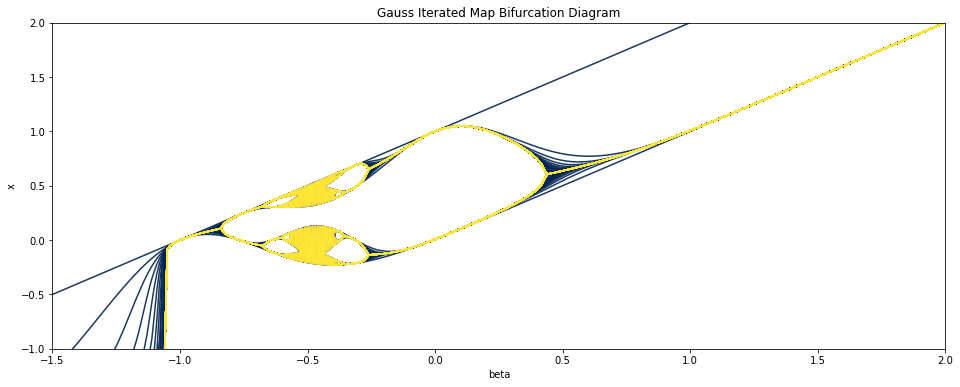

In [394]:
gauss_map_values.T.plot(figsize = (16,6), legend = False, xlim = (-1.5,2), ylim = (-1,2), alpha = 0.9, colormap= 'cividis',  
                        title = "Gauss Iterated Map Bifurcation Diagram")
plt.xlabel("beta")
plt.ylabel("x");

## Further Reading

1. *Feigenbaum scaling in discrete dynamical systems* by Keith Briggs ( [link](http://keithbriggs.info/documents/Keith_Briggs_PhD.pdf) )
2. Mitchell Feigenbaum's original paper on patterns in chaos http://chaosbook.org/extras/mjf/LA-6816-PR.pdf 
3. Learning resources for complex systems on [Complexity Explorer](https://www.complexityexplorer.org/courses); one specific[ introductory course](https://www.complexityexplorer.org/courses/98-introduction-to-dynamical-systems-and-chaos) may be helpful for those beginning to learn these subjects. 